In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import display, HTML

# Default 'warn'
pd.options.mode.chained_assignment = None 

main_data = pd.read_csv('dataverse_files/main_data.tab', sep="\t")
# Since many models and figures are based on time we drop
# any row that has not data in this column
main_data = main_data.dropna(axis=0, subset='time')

### Q1: Overview

After we have read the data and cleaned it based on `time` column, we create a DataFrame with the columns we need, to describe them and replicate SI.3.1.

In [2]:
s1_3_1 = main_data.dropna(axis=0, subset='time')

# Taking the columns we need
s1_3_1 = s1_3_1[[ 'repression', 'lnrepression', 'dumrepression', 'hostcity', 'prox_hotelonly', 'prox_hotelpress', 
    'time', 'time2', 'time3', 'lnpop_1970', 'literacy_avg', 'vote_frejuli', 'lnrebact1974',  
    'lnrepression70_77', 'latitude', 'lnstrikes', 'lnlag_strikes', 'lnlag2_strikes', 
    'zone1', 'zone2', 'zone3', 'zone4', 'zone5']]

# Latex notation for subscripts and superscripts
s1_3_1 = s1_3_1.rename(
    columns={
        'repression': 'Repression Events',
        'lnrepression': 'Repression Events$^a$',
        'dumrepression': 'Repression Events',
        'hostcity': 'Host City',
        'prox_hotelonly': 'Proximity to Hotel',
        'prox_hotelpress': 'Proximity to Journalist Venue',
        'time': 'Time',
        'time2': 'Time$^2$',
        'time3': 'Time$^3$',
        'lnpop_1970': 'Population Size$^a$',
        'literacy_avg': 'Literacy Rate',
        'vote_frejuli': 'Peronist Vote Share',
        'lnrebact1974': 'Rebel Activity$^a$',
        'lnrepression70_77': 'Past Repression$^a$',
        'latitude': '$Latitude$',
        'lnstrikes': 'Protest$_{Current \ month}^a$',
        'lnlag_strikes': 'Protest$_{One \ Month \ ago}^a$',
        'lnlag2_strikes': 'Protest$_{Two \ Months \ ago}^a$',
        'zone1': 'Military Zone 1',
        'zone2': 'Military Zone 2',
        'zone3': 'Military Zone 3',
        'zone4': 'Military Zone 4',
        'zone5': 'Military Zone 5',
        
    }
)

# Inverse DataFrame to look as the supporting table
s1_3_1 = s1_3_1.describe().T.drop(columns=['25%', '50%', '75%'])
s1_3_1 = s1_3_1.astype({
    'count': 'int',
})

# Changing the columns to 3 point precision
for col in ['mean', 'std', 'min', 'max']:
    s1_3_1[col] = s1_3_1[col].map('{:,.3f}'.format)

s1_3_1 = s1_3_1.rename(columns={
    'count': 'Obs.',
    'mean': 'Mean',
    'std': 'Std. dev.',
    'min': 'Min.',
    'max': 'Max.'
})

types = [
    'Count', 'Continuous', 'Binary', 'Binary', 'Continuous', 'Continuous',
    'Count', 'Count', 'Count', 'Continuous', 'Continuous', 'Continuous',
    'Continuous', 'Continuous', 'Continuous', 'Continuous', 'Continuous',
    'Continuous', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary',
]

s1_3_1.insert(0, 'Type', types)

# Converting DataFrame to HTML and adding extra information
# such as title and footnote
display(HTML('<div id="containerIntro"> \
                <h3 style="display:inline">Table SI.3.1.</h3> \
                <p style="display:inline; font-size:18px">Summary statistics (Main analyses)</p>\
            </div>' \
             + s1_3_1.to_html() + "<p>Note: $^a$ Variable logarithmized.</p>"))

,Type,Obs.,Mean,Std. dev.,Min.,Max.
Repression Events,Count,58107,0.005,0.104,0.000,7.000
Repression Events$^a$,Continuous,58107,0.003,0.053,0.000,2.079
Repression Events,Binary,58107,0.003,0.058,0.000,1.000
Host City,Binary,58383,0.010,0.100,0.000,1.000
Proximity to Hotel,Continuous,58107,7.000,1.613,0.000,9.398
Proximity to Journalist Venue,Continuous,58107,7.079,1.629,0.000,9.398
Time,Count,58383,0.590,0.338,0.010,1.170
Time$^2$,Count,58383,0.462,0.411,0.000,1.369
Time$^3$,Count,58383,0.407,0.460,0.000,1.602
Population Size$^a$,Continuous,56628,9.701,1.336,6.057,14.905


Now trying and replicate SI.3.2. To do that, we clean our DataFrame based on `postwc_time3mdum` column, as we want post world cup summary statistics.

In [3]:
s1_3_2 = main_data.dropna(axis=0, subset='postwc_time3mdum')

# Keeping the columns we need
s1_3_2 = s1_3_2[[ 'repression', 'lnrepression', 'hostcity', 'postwc_time3mdum',
    'time_postwc', 'time2_postwc', 'time3_postwc', 'lnpop_1970', 'literacy_avg', 'vote_frejuli', 'lnrebact1974',  
    'lnrepression70_77', 'zone1', 'zone2', 'zone3', 'zone4', 'zone5']]

# Latex notation for subscripts and superscripts
s1_3_2 = s1_3_2.rename(
    columns={
        'repression': 'Repression Events',
        'lnrepression': 'Repression Events$^a$',
        'hostcity': 'Host City',
        'postwc_time3mdum': 'Post World Cup Period',
        'time_postwc': 'Time$_{Post \ World \ Cup}$',
        'time2_postwc': 'Time$_{Post \ World \ Cup}^2$',
        'time3_postwc': 'Time$_{Post \ World \ Cup}^3$',
        'lnpop_1970': 'Population Size$^a$',
        'literacy_avg': 'Literacy Rate',
        'vote_frejuli': 'Peronist Vote Share',
        'lnrebact1974': 'Rebel Activity$^a$',
        'lnrepression70_77': 'Past Repression$^a$',
        'zone1': 'Military Zone 1',
        'zone2': 'Military Zone 2',
        'zone3': 'Military Zone 3',
        'zone4': 'Military Zone 4',
        'zone5': 'Military Zone 5',
        
    }
)

# Inverse DataFrame to look as the supporting table
s1_3_2 = s1_3_2.describe().T.drop(columns=['25%', '50%', '75%'], errors='ignore')
s1_3_2 = s1_3_2.astype({
    'count': 'int',
})

# Chaniging the columns to 3 point precision
for col in ['mean', 'std', 'min', 'max']:
    s1_3_2[col] = s1_3_2[col].map('{:,.3f}'.format)

s1_3_2 = s1_3_2.rename(columns={
    'count': 'Obs.',
    'mean': 'Mean',
    'std': 'Std. dev.',
    'min': 'Min.',
    'max': 'Max.'
})

types = [
    'Count', 'Continuous', 'Binary', 'Binary', 'Count', 'Count', 'Count',
    'Continuous', 'Continuous', 'Continuous', 'Continuous', 'Continuous',
    'Binary', 'Binary', 'Binary', 'Binary', 'Binary',
]

s1_3_2.insert(0, 'Type', types)

# Converting DataFrame to HTML and adding extra information
# such as title and footnote
display(HTML('<div id="containerIntro"> \
                <h3 style="display:inline">Table SI.3.2.</h3> \
                <p style="display:inline; font-size:18px">Summary statistics (Post-World Cup period)</p>\
            </div>' \
             + s1_3_2.to_html() + "<p>Note: $^a$ Variable logarithmized.</p>"))

,Type,Obs.,Mean,Std. dev.,Min.,Max.
Repression Events,Count,12425,0.003,0.068,0.000,3.000
Repression Events$^a$,Continuous,12425,0.002,0.041,0.000,1.386
Host City,Binary,12475,0.010,0.100,0.000,1.000
Post World Cup Period,Binary,12475,0.000,0.000,0.000,0.000
Time$_{Post \ World \ Cup}$,Count,12475,0.130,0.072,0.010,0.250
Time$_{Post \ World \ Cup}^2$,Count,12475,0.022,0.019,0.000,0.062
Time$_{Post \ World \ Cup}^3$,Count,12475,0.004,0.005,0.000,0.016
Population Size$^a$,Continuous,12100,9.701,1.336,6.057,14.905
Literacy Rate,Continuous,12100,0.717,0.110,0.316,0.901
Peronist Vote Share,Continuous,12275,58.752,11.539,28.500,94.300


Moving on to Figure 1 of the main paper, we read the data we need.

In [4]:
fig1 = pd.read_csv('dataverse_files/figure_1_data.tab', sep="\t")
fig1

,postcwy,event_selec,autochost,autochostperc
0,1.0,25.0,2.0,8.000000
1,2.0,31.0,4.0,12.903226
2,3.0,25.0,5.0,20.000000
3,4.0,24.0,6.0,25.000000
4,5.0,30.0,6.0,20.000000
5,6.0,32.0,9.0,28.125000
6,7.0,27.0,10.0,37.037037


First we insert the year intervals that correspond to `autochostperc` column

In [5]:
fig1.insert(0, 'Years', ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2014-2019', '2020-2024'])

In [6]:
# Disable top and right spine
# It is in a different cell, because when in the same as the plotting it doesn't work properly
plt.rcParams.update({'axes.spines.top': False, 'axes.spines.right': False})

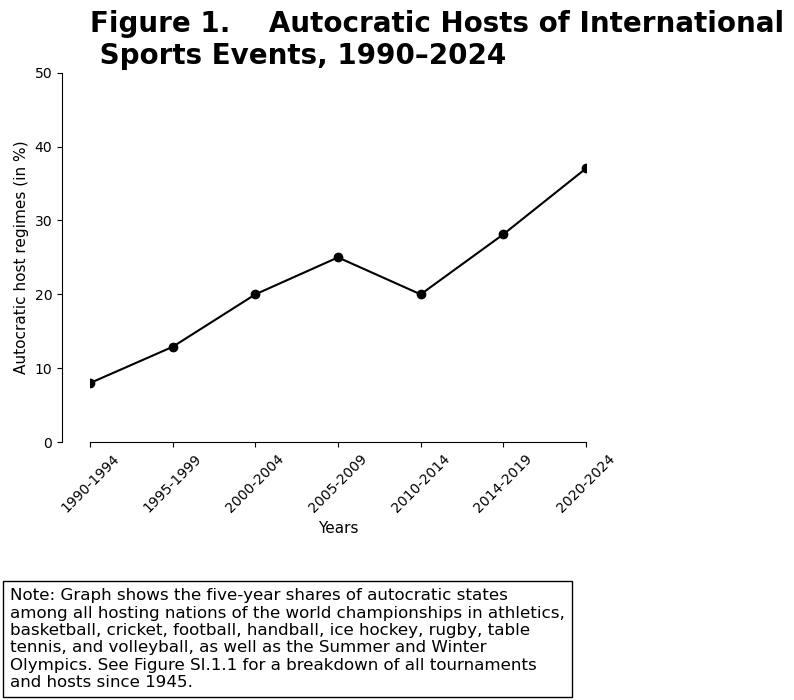

In [7]:
fig, ax = plt.subplots()


plt.title('Figure 1.    Autocratic Hosts of International\n Sports Events, 1990–2024', fontsize=20, loc='left',\
         fontweight="bold")

# Add footnote
plt.figtext(0.0, -0.4, \
"Note: Graph shows the five-year shares of autocratic states\n\
among all hosting nations of the world championships in athletics,\n\
basketball, cricket, football, handball, ice hockey, rugby, table \n\
tennis, and volleyball, as well as the Summer and Winter\n\
Olympics. See Figure SI.1.1 for a breakdown of all tournaments\n\
and hosts since 1945.", ha="left", fontsize=12, bbox={"facecolor":"white", "pad":5})

_ = ax.plot( fig1['Years'], fig1['autochostperc'], marker='o', c='black')

# Add space between axis
ax.spines['left'].set_position(('outward', 20))

plt.xticks(rotation=45)
# 0-6 corresponds to the categories we have for x axis
plt.xlim((0, 6))
plt.ylim(0, 50)

plt.xlabel('Years', fontsize=11) 
plt.ylabel('Autocratic host regimes (in %)', fontsize=11)

plt.show()

For Figure SI.1.1 we first want to read the data

In [8]:
s1_1_1 = pd.read_csv('dataverse_files/figure_SI11_data.tab', sep="\t")
print(s1_1_1.dtypes)
s1_1_1

year        float64
regime      float64
baseline    float64
democ       float64
autoc       float64
dtype: object


,year,regime,baseline,democ,autoc
0,1987.0,0.0,2.5,3.0,NaN
1,1987.0,0.0,2.5,3.0,NaN
2,1991.0,0.0,2.5,3.0,NaN
3,1991.0,0.0,2.5,3.0,NaN
4,1995.0,1.0,2.5,NaN,2.0
...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,NaN
329,2014.0,0.0,27.5,28.0,NaN
330,2018.0,0.0,27.5,28.0,NaN
331,2018.0,0.0,27.5,28.0,NaN


We see that all values are floats, so we fill NaN values with 0 and, then, we create `DA` column (stands for Democracy-Autocracy) and `champs` column.
* `DA` will be used to plot our markers
* `champs` will be used for labeling our ticks

In [9]:
# fill with 0
s1_1_1 = s1_1_1.fillna(0)

# create DA
s1_1_1['DA'] = np.where(s1_1_1['democ'] != 0.0, s1_1_1['democ'], s1_1_1['autoc'])
s1_1_1 = s1_1_1.loc[s1_1_1['DA'] != 0.0] # remove any garbage values

# create champs with lookup table
champs = {
    27.5: 'Volleyball World Championship', 
    25.0: 'Basketball World Cup', 
    22.5: 'World Table Tennis Championship',
    20.0: 'World Handball Championship',
    17.5: 'Cricket World Championship',
    15.0: 'FIFA World Cup',
    12.5: 'Ice Hockey World Championships',
    10.0: 'World Athletic Championships',
    7.5 : 'Summer Olympic Games',
    5.0 : 'Winter Olympic Games',
    2.5 : 'Rugby World Cup'
}
s1_1_1['champs'] = s1_1_1['baseline'].map(champs)
s1_1_1

,year,regime,baseline,democ,autoc,DA,champs
0,1987.0,0.0,2.5,3.0,0.0,3.0,Rugby World Cup
1,1987.0,0.0,2.5,3.0,0.0,3.0,Rugby World Cup
2,1991.0,0.0,2.5,3.0,0.0,3.0,Rugby World Cup
3,1991.0,0.0,2.5,3.0,0.0,3.0,Rugby World Cup
4,1995.0,1.0,2.5,0.0,2.0,2.0,Rugby World Cup
...,...,...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,0.0,28.0,Volleyball World Championship
329,2014.0,0.0,27.5,28.0,0.0,28.0,Volleyball World Championship
330,2018.0,0.0,27.5,28.0,0.0,28.0,Volleyball World Championship
331,2018.0,0.0,27.5,28.0,0.0,28.0,Volleyball World Championship


In [10]:
# Disable top and right spine
plt.rcParams.update({'axes.spines.top': False, 'axes.spines.right': False, 'axes.xmargin': 0.0})

Finally, we plot our data

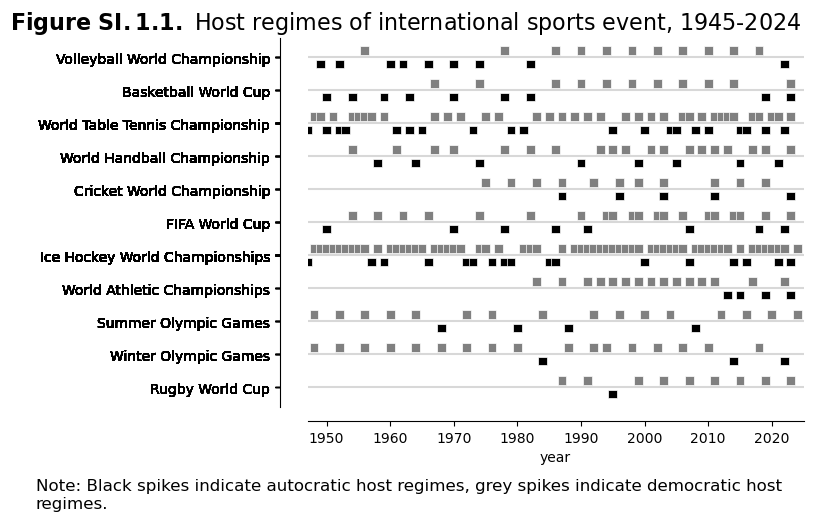

In [11]:
plt.autoscale(False)

ax = sns.scatterplot(data=s1_1_1, x='year', y='DA', marker='s', hue='regime', palette=['#808080', '#000000'], \
                 s=40, legend=False)
ax.autoscale(enable=False)

for y in set(s1_1_1['baseline'].values):
    ax.axhline(y, c='#808080', alpha=0.3)


ax.spines['left'].set_position(('outward', 20))
ax.spines['bottom'].set_position(('outward', 10))

plt.title(r'$\bf{Figure \ SI.1.1.}$' +  ' Host regimes of international sports event, 1945-2024', loc='left', 
          x=-0.6, fontsize=16)

# Footnote
plt.figtext(-0.3, -0.1, \
"Note: Black spikes indicate autocratic host regimes, grey spikes indicate democratic host\n\
regimes." , ha="left", fontsize=12)

# Remove ylabel
plt.ylabel('')

plt.xticks([tick for tick in range(1950, 2023, 10)])
plt.yticks(s1_1_1['baseline'], labels=s1_1_1['champs'])

plt.xlim((s1_1_1.year.min(), 2025), auto=False)
plt.ylim((s1_1_1.DA.min() - 1, s1_1_1.DA.max() + 1))

plt.show()

### Q2: Repression in Departments with and without Host Cities

First we need to take the main data to do the OLS and create our models based on the variables, that are being used for negative binomial in the main paper.

In [12]:
model1 = smf.ols('lnrepression ~ hostcity + hostcitytime + hostcitytime2 + time + time2 ', data=main_data)
reg_res1 = model1.fit(cov_type='HC1') # Of all HCns cov types this had the best results

model2 = smf.ols('lnrepression ~ hostcity + hostcitytime + hostcitytime2 + time + time2 + lnpop_1970 +\
            vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77', data=main_data)
reg_res2 = model2.fit(cov_type='HC1')

model3 = smf.ols('lnrepression ~ hostcity + hostcitytime + hostcitytime2 + time + time2  + lnpop_1970 + vote_frejuli +\
                 literacy_avg + lnrebact1974 + lnrepression70_77+ zone2 + zone3 +\
            zone4 + zone5', data=main_data)
reg_res3 = model3.fit(cov_type='HC1')

We print the results

In [13]:
for i, reg_res in enumerate([reg_res1, reg_res2, reg_res3], start=1):
    print("================================")
    print(f"Regression coefs for model {i}")
    print("================================")
    print(reg_res.params)

Regression coefs for model 1
Intercept        0.002569
hostcity         0.020187
hostcitytime     0.401240
hostcitytime2   -0.322958
time            -0.002841
time2            0.002021
dtype: float64
Regression coefs for model 2
Intercept           -0.004077
hostcity            -0.003689
hostcitytime         0.401445
hostcitytime2       -0.323106
time                -0.003046
time2                0.002169
lnpop_1970           0.000970
vote_frejuli        -0.000032
literacy_avg        -0.005559
lnrebact1974        -0.000121
lnrepression70_77    0.004079
dtype: float64
Regression coefs for model 3
Intercept           -0.003905
hostcity            -0.004028
hostcitytime         0.401445
hostcitytime2       -0.323106
time                -0.003046
time2                0.002169
lnpop_1970           0.003262
vote_frejuli         0.000010
literacy_avg        -0.023125
lnrebact1974        -0.001396
lnrepression70_77    0.003163
zone2               -0.014673
zone3               -0.011688
zone4  

We can see than all 3 models the *hostcitytime* variable has a positive coefficient, indicating a positive relation, whereas the *hostcitytime2* has a negative one.

Visualizing the result coefficients we have the following

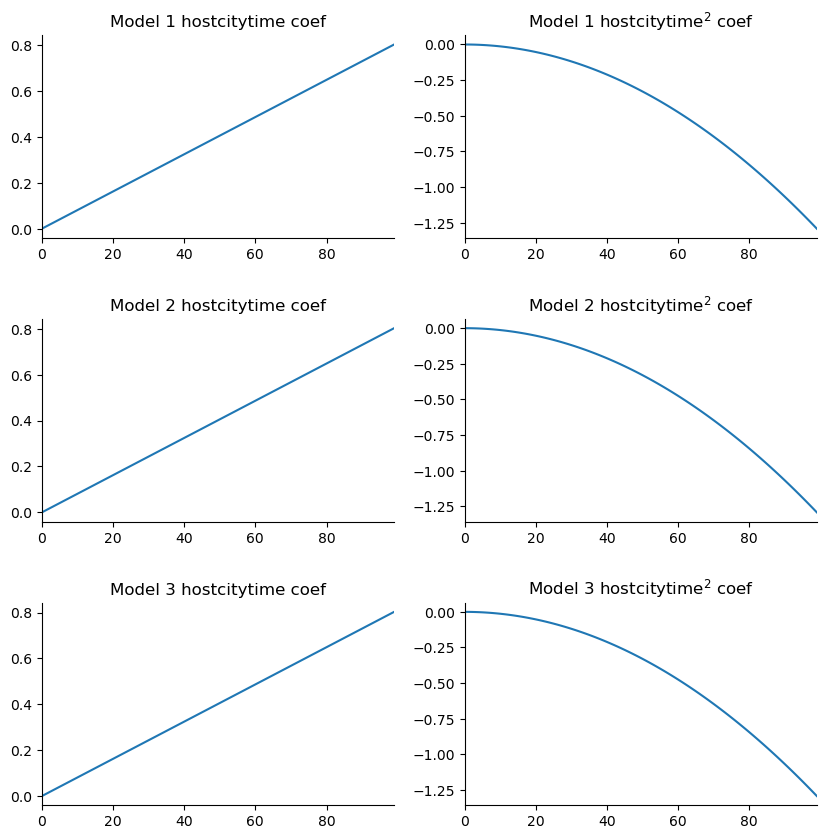

In [14]:
figure = plt.figure(figsize=(10, 10))
figure.subplots_adjust(hspace=0.4)

vals = np.linspace(0, 2, 100)

ypos1 = list()
yneg1 = list()

ypos2 = list()
yneg2 = list()

ypos3 = list()
yneg3 = list()

for x in vals:
    ypos1.append(x * reg_res1.params['hostcitytime'])
    yneg1.append((x ** 2) * reg_res1.params['hostcitytime2'])
    
    ypos2.append(x * reg_res2.params['hostcitytime'])
    yneg2.append((x ** 2) * reg_res2.params['hostcitytime2'])
    
    ypos3.append(x * reg_res3.params['hostcitytime'])
    yneg3.append((x ** 2) * reg_res3.params['hostcitytime2'])
    
ax = figure.add_subplot(3, 2, 1)
ax.set_title('Model 1 hostcitytime coef')
ax.plot(ypos1)

ax = figure.add_subplot(3, 2, 2)
ax.set_title('Model 1 hostcitytime$^2$ coef')
ax.plot(yneg1)

ax = figure.add_subplot(3, 2, 3)
ax.set_title('Model 2 hostcitytime coef')
ax.plot(ypos2)

ax = figure.add_subplot(3, 2, 4)
ax.set_title('Model 2 hostcitytime$^2$ coef')
ax.plot(yneg2)

ax = figure.add_subplot(3, 2, 5)
ax.set_title('Model 3 hostcitytime coef')
ax.plot(ypos3)

ax = figure.add_subplot(3, 2, 6)
ax.set_title('Model 3 hostcitytime$^2$ coef')
ax.plot(yneg3)

As we can see time$^2$ is used to break the linearity of repression and time and accounts for the inverted U-shaped relationship shaped by H$_1$ and H$_2$. The positive and negative respectively shows that repression in host cities went up and then decreased. In a while we will introduce R$^2$, which will show the percentage of variation of repression that our models explain, according to the variables we used.

The H$_1$ can be also visualized by the data we have been given. The gray area indicates World Cup period of time. As we can see repression drops during that time.

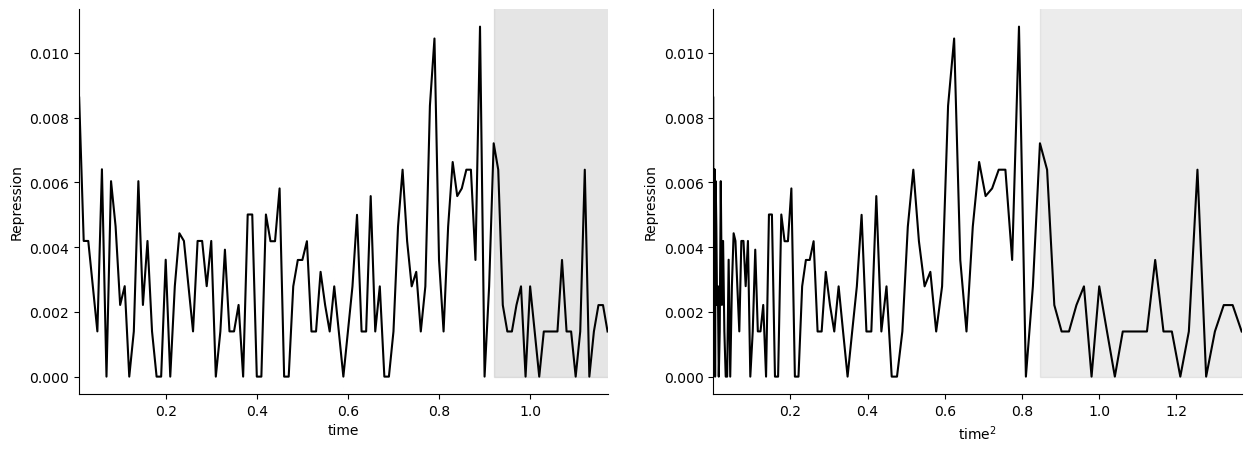

In [15]:
import matplotlib.patches as patches

t = main_data.dropna(axis=0, subset='time').groupby(by='time').mean(numeric_only=True)

figure = plt.figure(figsize=(15, 5))
figure.subplots_adjust(hspace=0.4)

ax1 = figure.add_subplot(1, 2, 1)
fg_left = sns.lineplot(data=t, x='time', y='lnrepression', c='#000000')
ax1.set_ylabel('Repression')
rect1 = patches.Rectangle((0.92, 0), width=25, height=0.03, color='gray', alpha=0.2)
fg_left.axes.add_patch(rect1)

ax2 = figure.add_subplot(1, 2, 2)
fg_right = sns.lineplot(data=t, x='time2', y='lnrepression', c='#000000')
ax2.set_ylabel('Repression')
rect1 = patches.Rectangle((0.92**2, 0), width=(1.17**2 - 0.92**2), height=0.03, color='gray', alpha=0.15)
ax2.set_xlabel('time$^2$')
fg_right.axes.add_patch(rect1)

plt.show()

Now, to create the table we need our models summaries.

In [16]:
# Uncomment if you want to print summaries
#for i, reg_res in enumerate([reg_res1, reg_res2, reg_res3], start=1):
#    print("==============================================================================")
#    print(f"\t\t\tRegression summaries for model {i}")
#    print("==============================================================================")
#    print(reg_res.summary())

In [17]:
coefs_table = pd.DataFrame(data={'(3)': reg_res3.params}, dtype=str)
coefs_table.insert(0, '(2)', reg_res2.params.astype(str))
coefs_table.insert(0, '(1)', reg_res1.params.astype(str))
coefs_table.fillna('', inplace=True)

# Keep 3 point precision as in main paper
coefs_table = coefs_table.applymap(lambda x: str(round(float(x), 3)) if x != '' else x)
coefs_table.drop('Intercept', axis=0, inplace=True)

# reindex right order
coefs_table = coefs_table.reindex(['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', \
                    'literacy_avg', 'vote_frejuli', 'lnrebact1974', 'lnrepression70_77', \
                                  'zone2', 'zone3', 'zone4', 'zone5'])

# Add F-stat r squared and obs to our DataFrame
reg_res_table = pd.DataFrame(data =
                           {
                               '(1)': [reg_res1.fvalue, reg_res1.rsquared, reg_res1.nobs],
                               '(2)': [reg_res2.fvalue, reg_res2.rsquared, reg_res2.nobs],
                               '(3)': [reg_res3.fvalue, reg_res3.rsquared, reg_res3.nobs],
                           }, index=['F Statistic', 'R Squared', 'Observations'], dtype=str)

# Keep 2 point precision as in SI
reg_res_table = reg_res_table.applymap(lambda x: str(round(float(x), 2)))

# Make Obs look like int 
reg_res_table.loc['Observations', '(1)':'(3)'] = reg_res_table.loc['Observations', '(1)':'(3)']\
                .apply(lambda x: x[:-2])

coefs_table = pd.concat(objs=[coefs_table, reg_res_table], axis=0)

Now we add asterisk and the cross according to the p values. We calculated above the summaries with the p values, so it's just a lookup.

In [18]:
for i, reg_res in enumerate([reg_res1, reg_res2, reg_res3], start=1):
    for name, val in coefs_table[f'({i})'].items():
        if name == 'F Statistic':
            break
        if coefs_table.loc[name, f'({i})'] == '':
            continue
        pvalue = round(reg_res.pvalues[name], 3)
        
        if  pvalue <= 0.001:
            coefs_table.loc[name, f'({i})'] += '***'
                
        elif pvalue <= 0.01:
            coefs_table.loc[name, f'({i})'] += '**'
                
        elif pvalue <= 0.05:
            coefs_table.loc[name, f'({i})'] += '*'
                
        elif pvalue <= 0.1:
            coefs_table.loc[name, f'({i})'] += '$^\u271D$'
        
coefs_table.loc['F Statistic', '(1)':'(3)'] += '***'

Finally we add the covariance se for each parameter of each model

In [19]:
for i, reg_res in enumerate([reg_res1, reg_res2, reg_res3], start=1):
    for name, val in coefs_table[f'({i})'].items():
        if name == 'F Statistic':
            break
        if val != '':
            coefs_table.loc[name, f'({i})'] += "\\n" + '(%.3f)' % reg_res.HC1_se[name]

In [20]:
names = {
    'hostcity': 'Host City',
    'hostcitytime': 'Host City $\times$ Time',
    'hostcitytime2': 'Host City $\times$ Time$^2$',
    'time': 'Time',
    'time2': 'Time$^2$',
    'lnpop_1970': 'Population Size',
    'vote_frejuli': 'Peronist vote share',
    'literacy_avg': 'Literacy rate',
    'lnrebact1974': 'Rebel activity',
    'lnrepression70_77': 'Past repression',
    'R Squared': 'R$^2$'
}

coefs_table.rename(names, inplace=True)

# Converting DataFrame to HTML and adding extra information
# such as title and footnote
display(HTML('<div id="containerIntro"> \
                <h3 style="display:inline">Table SI.4.1.</h3> \
                <p style="display:inline; font-size:18px">Linear regressions (OLS) for repression in departments \
                with and without host cities</p> \
            </div>' \
             + coefs_table.to_html().replace('\\n', '<br>') +\
             '<p>Note: Values are coefficients with robust standard errors in parentheses.</p>\
<p>$^†$p<0.1, * p<0.05, ** p<0.01, *** p<0.001</p>'))

,(1),(2),(3)
Host City $\times$ Time,0.401**(0.144),0.401**(0.143),0.401**(0.142)
Host City $\times$ Time$^2$,-0.323**(0.110),-0.323**(0.110),-0.323**(0.109)
Host City,0.02(0.034),-0.004(0.034),-0.004(0.034)
Time,-0.003(0.002),-0.003(0.002),-0.003(0.002)
Time$^2$,0.002(0.002),0.002(0.002),0.002(0.002)
Population Size,,0.001***(0.000),0.003***(0.000)
Literacy rate,,-0.006***(0.001),-0.023***(0.002)
Peronist vote share,,-0.0$^✝$(0.000),0.0(0.000)
Rebel activity,,-0.0(0.000),-0.001***(0.000)
Past repression,,0.004***(0.000),0.003***(0.000)


### Q3: Graphical Overview of Effects 

To replicate figure 5, we must begin by creating our own model and using its predictions to plot

In [21]:
# C(var) is used for categorical variables
q3_model = smf.ols('repression ~ C(hostcity)*time + lnpop_1970 + literacy_avg + lnrebact1974 +\
                    lnrepression70_77 + C(zone2) + C(zone3) + C(zone4) + C(zone5)', data=main_data)\
                .fit(cov_type='HC1')
q3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             repression   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     13.19
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.59e-25
Time:                        16:39:39   Log-Likelihood:                 48309.
No. Observations:               56394   AIC:                        -9.659e+04
Df Residuals:                   56382   BIC:                        -9.649e+04
Df Model:                          11                                         
Covariance Type:                  HC1                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0045      0.005     -0.975      0.330      -0.013       0.005
C(hostcity)[T.1.0]          0.1180      0.037      3.187      0.001       0.045       0.191
C(zone2)[T.1]              -0.0265      0.003     -8.078      0.000      -0.033      -0.020
C(zone3)[T.1]              -0.0210      0.003     -7.578      0.000      -0.026      -0.016
C(zone4)[T.1]              -0.0173      0.006     -2.724      0.006      -0.030      -0.005
C(zone5)[T.1]              -0.0169      0.002     -7.924      0.000      -0.021      -0.013
time                       -0.0009      0.001     -0.891      0.373      -0.003       0.001
C(hostcity)[T.1.0]:time     0.0625      0.061      1.027      0.305      -0.057       0.182
lnpop_1970                  0.0057      0.001      6.475      0.000       0.004       0.007
literacy_avg               -0.0425      0.005     -8.355      0.000      -0.053      -0.033
lnrebact1974               -0.0025      0.000     -5.734      0.000      -0.003      -0.002
lnrepression70_77           0.0055      0.001      7.113      0.000       0.004       0.007
==============================================================================
Omnibus:                   145241.449   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3536940890.970
Skew:                          29.535   Prob(JB):                         0.00
Kurtosis:                    1228.460   Cond. No.                         350.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

As we found [here](https://stackoverflow.com/questions/17559408/confidence-and-prediction-intervals-with-statsmodels#answer-47191929) *summary_frame* gives us a DataFrame containing the predictions (mean), prediction's standard error (mean_se), prediction's upper and lower Confidence Interval bound (mean_ci_upper and mean_ci_lower respectively) and the same bounds for our observations (obs_ci_upper and obs_ci_lower). We set alpha to 0.05, so we can get 95% confidence interval.

In [22]:
predictions = q3_model.get_prediction().summary_frame(alpha=0.05)
# To verify mean is equal to fitted values
#print(predictions['mean'])
#print(q3_model.fittedvalues.to_frame())
predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
59,-0.005509,0.001669,-0.008780,-0.002239,-0.206919,0.195900
60,-0.005519,0.001664,-0.008780,-0.002258,-0.206928,0.195890
61,-0.005528,0.001659,-0.008780,-0.002277,-0.206937,0.195881
62,-0.005538,0.001654,-0.008780,-0.002295,-0.206947,0.195871
63,-0.005547,0.001650,-0.008780,-0.002314,-0.206956,0.195862
...,...,...,...,...,...,...
133367,-0.012355,0.001608,-0.015507,-0.009204,-0.213763,0.189052
133368,-0.012365,0.001611,-0.015523,-0.009207,-0.213772,0.189043
133369,-0.012374,0.001615,-0.015539,-0.009209,-0.213782,0.189033
133370,-0.012384,0.001618,-0.015556,-0.009212,-0.213792,0.189024


Concatenate our DataFrame with the main_data

In [23]:
main_data_predictions = pd.concat([predictions, main_data], axis=1)
main_data_predictions = main_data_predictions.dropna(subset='mean')
main_data_predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,muni,id,prov,id_prov,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
59,-0.005509,0.001669,-0.008780,-0.002239,-0.206919,0.195900,adolfo alsina,1.0,buenos aires,1.0,...,0,0,0,1,0,0,0,NaN,NaN,NaN
60,-0.005519,0.001664,-0.008780,-0.002258,-0.206928,0.195890,adolfo alsina,1.0,buenos aires,1.0,...,0,0,0,1,0,0,0,NaN,NaN,NaN
61,-0.005528,0.001659,-0.008780,-0.002277,-0.206937,0.195881,adolfo alsina,1.0,buenos aires,1.0,...,0,0,0,1,0,0,0,NaN,NaN,NaN
62,-0.005538,0.001654,-0.008780,-0.002295,-0.206947,0.195871,adolfo alsina,1.0,buenos aires,1.0,...,0,0,0,1,0,0,0,NaN,NaN,NaN
63,-0.005547,0.001650,-0.008780,-0.002314,-0.206956,0.195862,adolfo alsina,1.0,buenos aires,1.0,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133367,-0.012355,0.001608,-0.015507,-0.009204,-0.213763,0.189052,trancas,498.0,tucuman,24.0,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133368,-0.012365,0.001611,-0.015523,-0.009207,-0.213772,0.189043,trancas,498.0,tucuman,24.0,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133369,-0.012374,0.001615,-0.015539,-0.009209,-0.213782,0.189033,trancas,498.0,tucuman,24.0,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133370,-0.012384,0.001618,-0.015556,-0.009212,-0.213792,0.189024,trancas,498.0,tucuman,24.0,...,0,1,0,0,0,0,0,NaN,NaN,NaN


Create DataFrames holding data depending on hostcity

In [24]:
main_data_predictions_host = main_data_predictions.loc[main_data_predictions['hostcity'] == 1.0]
main_data_predictions_no_host = main_data_predictions.loc[main_data_predictions['hostcity'] == 0.0]

# subtracting from prediction the CI margin
main_data_predictions_host['mean'] -= abs(main_data_predictions_host['mean_ci_upper'])\
                                            - abs(main_data_predictions_host['mean_ci_lower'])

main_data_predictions_no_host['mean'] -= abs(main_data_predictions_no_host['mean_ci_upper'])\
                                            - abs(main_data_predictions_no_host['mean_ci_lower'])


Before plotting we are going to normalize repression between [0, 0.2] for host cities and [0, 0.02] for other cities, so they can fit on our plots.

In [50]:
x_min = main_data_predictions_host['repression'].min()
x_max = main_data_predictions_host['repression'].max()
main_data_predictions_host['host_norm'] = main_data_predictions_host['repression']\
                .apply(lambda x: 2 * round((x - x_min) / (10 * (x_max - x_min)), 3))

x_min = main_data_predictions_no_host['repression'].min()
x_max = main_data_predictions_no_host['repression'].max()
main_data_predictions_no_host['host_norm'] = main_data_predictions_no_host['repression']\
                .apply(lambda x: 2 * round((x - x_min) / (100 * (x_max - x_min)), 3))

Now, we plot the figure

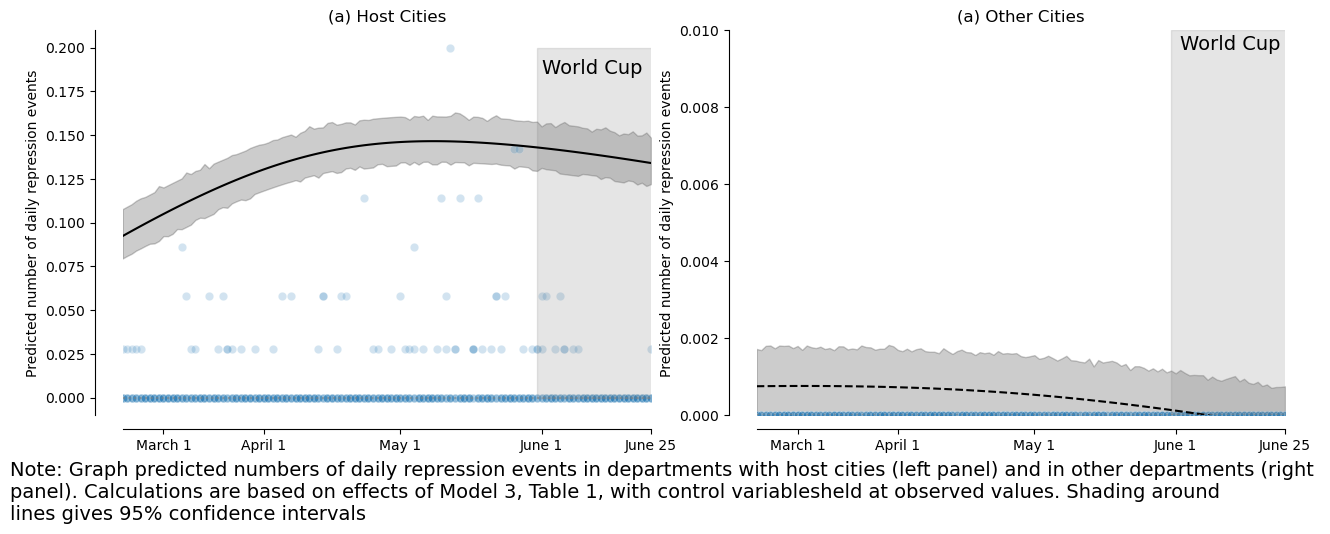

In [60]:
figure = plt.figure(figsize=(15, 5))
figure.subplots_adjust(hspace=5)

# Left Plot
ax = figure.add_subplot(1, 2, 1)

# Main Data for left plot
fg_left = sns.lineplot(data=main_data_predictions_host, x='time', y='mean_ci_lower', errorbar=('ci', 95), c='#000000')
fg_left = sns.scatterplot(data=main_data_predictions_host, x='time', y='host_norm' , alpha=0.2)

# Secondary Data for left plot
ax.set_title('(a) Host Cities')
ax.set_ylabel('Predicted number of daily repression events')
ax.set_xlabel('')
ax.set_xticks(ticks=[0.1, 0.32, 0.62, 0.93, 1.17], labels=['March 1', 'April 1', 'May 1', 'June 1', 'June 25'])

# Patch for World cup duration
rect1 = patches.Rectangle((0.92, 0), width=25, height=0.2, color='gray', alpha=0.2)
fg_left.axes.add_patch(rect1)
ax.annotate(text='World Cup', xy=(0.93, 0.185), size=14)

# For figure replication
ax.axhline(0.0, c='#808080', alpha=0.6, linestyle = 'dotted')
ax.spines['left'].set_position(('outward', 20)) 
ax.spines['bottom'].set_position(('outward', 10)) 

# Right Plot
ax = figure.add_subplot(1, 2, 2)

# Main Data for right plot
fg_right = sns.lineplot(data=main_data_predictions_no_host, x='time', y='mean_ci_lower', errorbar=('ci', 95), c='#000000')
fg_right = sns.scatterplot(data=main_data_predictions_host, x='time', y='host_norm' , alpha=0.2)

# Secondary Data for right plot
ax.set_ylim((0, 0.01))
ax.lines[0].set_linestyle("--")
ax.set_title('(a) Other Cities')
ax.set_ylabel('Predicted number of daily repression events')
ax.set_xlabel('')
ax.set_xticks(ticks=[0.1, 0.32, 0.62, 0.93, 1.17], labels=['March 1', 'April 1', 'May 1', 'June 1', 'June 25'])

# Patch for World cup duration
rect1 = patches.Rectangle((0.92, 0), width=25, height=0.01, color='gray', alpha=0.2)
fg_right.axes.add_patch(rect1)
ax.annotate(text='World Cup', xy=(0.94, 0.0095), size=14)

# For figure replication
ax.axhline(0.0, c='#808080', alpha=0.6, linestyle = 'dotted')
ax.spines['left'].set_position(('outward', 20)) 
ax.spines['bottom'].set_position(('outward', 10))

# Note below the figure
plt.figtext(0.05, -0.1, s="Note: Graph predicted numbers of daily repression events in departments with \
host cities (left panel) and in other departments (right \npanel). Calculations are based on effects of Model 3, \
Table 1, with control variablesheld at observed values. Shading around\nlines gives 95% confidence intervals" ,\
ha="left", fontsize=14)

plt.show()

Here we can clearly see that repression on host cities increases the months before the world cup, whereas on other cities repression stays nearly the same, although it follows this descenting trend. This is something that also supports H$_2$. We can also see that repression in host cities is substancially higher than other cities.

### Q4: Robustness Check Using a Dichotomous Indicator of Repression

Here, we are going to follow the same procedure as Q2, but with different models. So, firstly, we build these models.

In [27]:
log_model1 = smf.logit('dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2', main_data)\
                    .fit(cov_type='HC1')

log_model2 = smf.logit('dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 +\
            lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77', main_data).fit(cov_type='HC1')

log_model3 = smf.logit('dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 +\
            lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 +\
            zone2 + zone3 + zone4 + zone5', main_data).fit(cov_type='HC1')

ols_model1 = smf.ols('dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2', main_data).fit(cov_type='HC1')

ols_model2 = smf.ols('dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 +\
            lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77', main_data).fit(cov_type='HC1')

ols_model3 = smf.ols('dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 +\
            lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 +\
            zone2 + zone3 + zone4 + zone5', main_data).fit(cov_type='HC1')

Optimization terminated successfully.
         Current function value: 0.019190
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.013826
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.013570
         Iterations 13


Now, because we have 6 models we print only the p_values which we'll need to annotate the results on the table.

In [28]:
models = [log_model1, log_model2, log_model3, ols_model1, ols_model2, ols_model3]

for i, model in enumerate(models, start=1):
    print(f"Model indexed {i}")
    for value in model.pvalues:
        print( "%.3f" % value, end=" ")
    print()

Model indexed 1
0.000 0.047 0.045 0.000 0.413 0.535 
Model indexed 2
0.000 0.022 0.021 0.010 0.362 0.484 0.000 0.653 0.948 0.531 0.000 
Model indexed 3
0.000 0.018 0.017 0.054 0.361 0.483 0.001 0.186 0.967 0.102 0.000 0.000 0.000 0.532 0.105 
Model indexed 4
0.000 0.044 0.031 0.213 0.419 0.524 
Model indexed 5
0.016 0.042 0.029 0.584 0.376 0.480 0.000 0.023 0.000 0.208 0.000 
Model indexed 6
0.060 0.040 0.028 0.581 0.376 0.480 0.000 0.957 0.000 0.000 0.000 0.000 0.000 0.131 0.000 


Creating a DataFrame based on the coefficients.

In [29]:
multi_coefs_table = pd.DataFrame(data={ ('OLS', '(6)'): ols_model3.params}, dtype=str)
multi_coefs_table.insert(0, ('OLS', '(5)'), ols_model2.params.astype(str))
multi_coefs_table.insert(0, ('OLS', '(4)'), ols_model1.params.astype(str))
multi_coefs_table.insert(0, ('Logit', '(3)'), log_model3.params.astype(str))
multi_coefs_table.insert(0, ('Logit', '(2)'), log_model2.params.astype(str))
multi_coefs_table.insert(0, ('Logit', '(1)'), log_model1.params.astype(str))
multi_coefs_table.fillna('', inplace=True)

# Keep 3 point precision as in SI
multi_coefs_table = multi_coefs_table.applymap(lambda x: str(round(float(x), 3)) if x != '' else x)
multi_coefs_table.drop('Intercept', axis=0, inplace=True)

# reindex right order
multi_coefs_table = multi_coefs_table.reindex(['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', \
                    'literacy_avg', 'vote_frejuli', 'lnrebact1974', 'lnrepression70_77', \
                                  'zone2', 'zone3', 'zone4', 'zone5', 'waldx', 'pseudor', 'fstat', 'r2', 'obs'])

Annotate based on p values

In [30]:
f_col = 'Logit'
for i, reg_res in enumerate(models, start=1):
    if i > 3:
        f_col = 'OLS'
    for name, val in multi_coefs_table[(f_col, f'({i})')].items():
        if multi_coefs_table.loc[name, (f_col, f'({i})')] == '':
            continue
        if name == 'waldx':
            break
        pvalue = round(reg_res.pvalues[name], 3)
        if  pvalue <= 0.001:
            multi_coefs_table.loc[name, (f_col, f'({i})')] += '***'
                
        elif pvalue <= 0.01:
            multi_coefs_table.loc[name, (f_col, f'({i})')] += '**'
                
        elif pvalue <= 0.05:
            multi_coefs_table.loc[name, (f_col, f'({i})')] += '*'
                
        elif pvalue <= 0.1:
            multi_coefs_table.loc[name, (f_col, f'({i})')] += '$^\u271D$'
        

In [31]:
print(ols_model1.f_pvalue)
print(ols_model2.f_pvalue)
print(ols_model3.f_pvalue)

1.94717523448706e-15
5.566336344713598e-37
2.151240402368735e-35


Add more info

In [32]:
ols_models = [ols_model1, ols_model2, ols_model3]
for i, reg_res in enumerate(ols_models, start=4):
    for name, val in multi_coefs_table[('OLS', f'({i})')].items():
        if name == 'waldx' or name == 'pseudor':
            multi_coefs_table.loc[name, ('OLS', f'({i})')] = ''
        elif name == 'fstat':
            multi_coefs_table.loc['fstat', ('OLS', f'({i})')] = str(round(reg_res.fvalue, 2)) + '***'
        elif name == 'r2':
            multi_coefs_table.loc['r2', ('OLS', f'({i})')] = round(reg_res.rsquared, 2)
        elif name == 'obs':
            multi_coefs_table.loc['obs', ('OLS', f'({i})')] = int(reg_res.nobs)
        elif val != '':
            multi_coefs_table.loc[name, ('OLS', f'({i})')] += '\\n' + '(%.3f)' % reg_res.HC1_se[name]
        
log_models = [log_model1, log_model2, log_model3]
for i, reg_res in enumerate(log_models, start=1):
    for name, val in multi_coefs_table[('Logit', f'({i})')].items():
        if name == 'fstat' or name == 'r2':
            multi_coefs_table.loc[name, ('Logit', f'({i})')] = ''
        elif name == 'waldx':
            # Cells below shows an example
            multi_coefs_table.loc['waldx', ('Logit', f'({i})')] = reg_res.wald_test(
                f'({" + ".join([param[0] for param in list(reg_res.params.items())])} = 0)'\
                , use_f=True, scalar=True
            ).summary()[11:17]
        elif name == 'pseudor':
            multi_coefs_table.loc['pseudor', ('Logit', f'({i})')] = round(reg_res.prsquared, 2)
        elif name == 'obs':
            multi_coefs_table.loc['obs', ('Logit', f'({i})')] = int(reg_res.nobs)
        elif val != '':
            multi_coefs_table.loc[name, ('Logit', f'({i})')] += '\\n' + '(%.3f)' % reg_res.bse[name]

In [33]:
' + '.join([param[0] for param in list(log_model1.params.items())])

'Intercept + hostcitytime + hostcitytime2 + hostcity + time + time2'

In [34]:
log_model1.wald_test(
    f'({" + ".join([param[0] for param in list(log_model1.params.items()) if param[0] != "Intercept"])} = 0)',
                     use_f=True, scalar=True
                    )

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=122.97331473183365, p=1.5098471834017972e-28, df_denom=5.81e+04, df_num=1>

In [35]:
log_model1.wald_test(
    f'({" + ".join([param[0] for param in list(log_model1.params.items())])} = 0)',
                     use_f=True, scalar=True
                    )

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=108.16510756215499, p=2.6028780795533654e-25, df_denom=5.81e+04, df_num=1>

In [36]:
log_model1.wald_test(
    f'({" + ".join([param[0] for param in list(log_model1.params.items())])} = 0)',
                     use_f=True, scalar=True
                    ).summary()

'<F test: F=108.16510756215499, p=2.6028780795533654e-25, df_denom=5.81e+04, df_num=1>'

In [37]:
log_model1.wald_test(
    f'({" + ".join([param[0] for param in list(log_model1.params.items())])} = 0)',
                     use_f=True, scalar=True
                    ).summary()[11:17]

'108.16'

In [38]:
names = {
    'hostcity': 'Host City',
    'hostcitytime': 'Host City * Time',
    'hostcitytime2': 'Host City * Time$^2$',
    'time': 'Time',
    'time2': 'Time$^2$',
    'lnpop_1970': 'Population Size',
    'vote_frejuli': 'Peronist vote share',
    'literacy_avg': 'Literacy rate',
    'lnrebact1974': 'Rebel activity',
    'lnrepression70_77': 'Past repression',
    'R Squared': 'R$^2$',
    'waldx': 'wald χ$^2$',
    'pseudor': 'Pseudo R$^2$',
    'fstat': 'F Statistic',
    'r2': 'R$^2$',
    'obs': 'Observations'
}

multi_coefs_table.rename(names, inplace=True)

# Converting DataFrame to HTML and adding extra information
# such as title and footnote
display(HTML('<div id="containerIntro"> \
                <h3 style="display:inline">Table SI.4.5.</h3> \
                <p style="display:inline; font-size:18px">Regression results for binary variable of repression</p> \
            </div>' \
             + multi_coefs_table.to_html().replace('\\n', '<br>') +\
             '<p>Note: Values are coefficients with robust standard errors in parentheses.</p>\
<p>$^†$p<0.1, * p<0.05, ** p<0.01, *** p<0.001</p>'))

### Q5: Robustness Check Using Matched Samples

Finally, we will create some last models to use for the last table and Figure

In [39]:
matched_model = smf.ols('repression ~ C(hostcity)*time + lnpop_1970 + literacy_avg + lnrebact1974 +\
                    lnrepression70_77 + C(zone2) + C(zone3) + C(zone4) + C(zone5)', \
                        data=main_data).fit(cov_type='HC1')
matched_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             repression   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     13.19
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.59e-25
Time:                        16:39:42   Log-Likelihood:                 48309.
No. Observations:               56394   AIC:                        -9.659e+04
Df Residuals:                   56382   BIC:                        -9.649e+04
Df Model:                          11                                         
Covariance Type:                  HC1                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0045      0.005     -0.975      0.330      -0.013       0.005
C(hostcity)[T.1.0]          0.1180      0.037      3.187      0.001       0.045       0.191
C(zone2)[T.1]              -0.0265      0.003     -8.078      0.000      -0.033      -0.020
C(zone3)[T.1]              -0.0210      0.003     -7.578      0.000      -0.026      -0.016
C(zone4)[T.1]              -0.0173      0.006     -2.724      0.006      -0.030      -0.005
C(zone5)[T.1]              -0.0169      0.002     -7.924      0.000      -0.021      -0.013
time                       -0.0009      0.001     -0.891      0.373      -0.003       0.001
C(hostcity)[T.1.0]:time     0.0625      0.061      1.027      0.305      -0.057       0.182
lnpop_1970                  0.0057      0.001      6.475      0.000       0.004       0.007
literacy_avg               -0.0425      0.005     -8.355      0.000      -0.053      -0.033
lnrebact1974               -0.0025      0.000     -5.734      0.000      -0.003      -0.002
lnrepression70_77           0.0055      0.001      7.113      0.000       0.004       0.007
==============================================================================
Omnibus:                   145241.449   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3536940890.970
Skew:                          29.535   Prob(JB):                         0.00
Kurtosis:                    1228.460   Cond. No.                         350.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

Taking the predictions

In [40]:
matched_main_data = main_data.loc[main_data['matched_simple'] == 1.0]
matched_prediction = matched_model.get_prediction(matched_main_data).summary_frame(alpha=0.05)
matched_prediction

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.043282,0.004370,0.034717,0.051847,-0.158283,0.244847
1,0.043273,0.004368,0.034712,0.051833,-0.158292,0.244838
2,0.043263,0.004365,0.034708,0.051819,-0.158301,0.244828
3,0.043254,0.004363,0.034703,0.051805,-0.158310,0.244818
4,0.043245,0.004361,0.034698,0.051791,-0.158319,0.244809
...,...,...,...,...,...,...
4090,0.036493,0.003995,0.028663,0.044323,-0.165042,0.238028
4091,0.036484,0.003995,0.028655,0.044313,-0.165051,0.238019
4092,0.036474,0.003994,0.028646,0.044302,-0.165061,0.238009
4093,0.036465,0.003993,0.028638,0.044292,-0.165070,0.238000


Concating them with the rest of our data

In [41]:
matched = pd.concat([matched_prediction, matched_main_data.reset_index()], axis=1)
matched

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,index,muni,id,prov,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,0.043282,0.004370,0.034717,0.051847,-0.158283,0.244847,863,almirante brown,4.0,buenos aires,...,0,0,0,0,0,0,0,1.0,NaN,NaN
1,0.043273,0.004368,0.034712,0.051833,-0.158292,0.244838,864,almirante brown,4.0,buenos aires,...,0,0,0,0,0,0,0,1.0,NaN,NaN
2,0.043263,0.004365,0.034708,0.051819,-0.158301,0.244828,865,almirante brown,4.0,buenos aires,...,0,0,0,0,0,0,0,1.0,NaN,NaN
3,0.043254,0.004363,0.034703,0.051805,-0.158310,0.244818,866,almirante brown,4.0,buenos aires,...,0,0,0,0,0,0,0,1.0,NaN,NaN
4,0.043245,0.004361,0.034698,0.051791,-0.158319,0.244809,867,almirante brown,4.0,buenos aires,...,0,0,0,0,0,0,0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,0.036493,0.003995,0.028663,0.044323,-0.165042,0.238028,129615,capital,484.0,tucuman,...,0,1,0,0,0,0,0,1.0,1.0,NaN
4091,0.036484,0.003995,0.028655,0.044313,-0.165051,0.238019,129616,capital,484.0,tucuman,...,0,1,0,0,0,0,0,1.0,1.0,NaN
4092,0.036474,0.003994,0.028646,0.044302,-0.165061,0.238009,129617,capital,484.0,tucuman,...,0,1,0,0,0,0,0,1.0,1.0,NaN
4093,0.036465,0.003993,0.028638,0.044292,-0.165070,0.238000,129618,capital,484.0,tucuman,...,0,1,0,0,0,0,0,1.0,1.0,NaN


Splitting data to host and non-host and plotting data as Figure 5

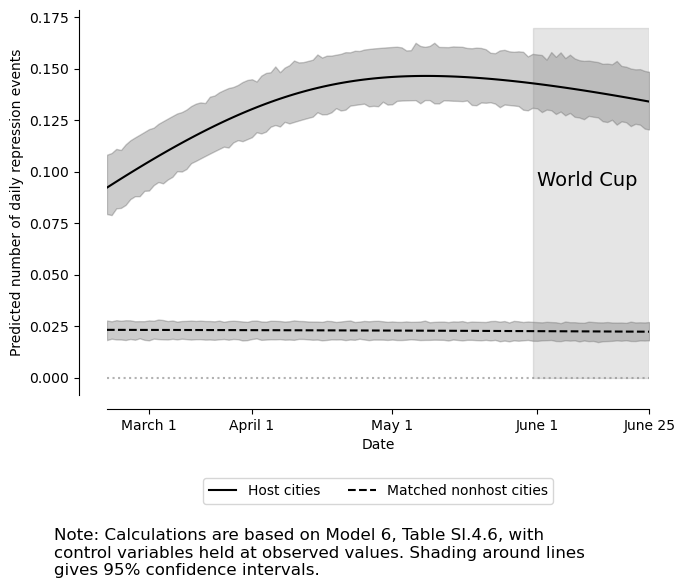

In [54]:
matched_host = matched.loc[matched['hostcity'] == 1.0]
matched_no_host = matched.loc[matched['hostcity'] == 0.0]

figure = plt.figure(figsize=(7, 5))
figure.subplots_adjust(hspace=5)

fig6 = sns.lineplot(data=matched_host, x='time', y='mean_ci_lower', errorbar=('ci', 95), c='#000000',\
                    label='Host cities')
fig6 = sns.lineplot(data=matched_no_host, x='time', y='mean_ci_lower', errorbar=('ci', 95), c='#000000', \
                    label='Matched nonhost cities')

fig6.lines[1].set_linestyle("--")

plt.xticks(ticks=[0.1, 0.32, 0.62, 0.93, 1.17], labels=['March 1', 'April 1', 'May 1', 'June 1', 'June 25'])
plt.ylabel('Predicted number of daily repression events')
plt.xlabel('Date')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3),
          ncol=2, fancybox=True)

# Patch for World cup duration
rect1 = patches.Rectangle((0.92, 0), width=0.25, height=0.17, color='gray', alpha=0.2)
fig6.axes.add_patch(rect1)
plt.annotate(text='World Cup', xy=(0.93, 0.093), size=14)

# For figure replication
plt.axhline(0.0, c='#808080', alpha=0.6, linestyle = 'dotted')
fig6.spines['left'].set_position(('outward', 20)) 
fig6.spines['bottom'].set_position(('outward', 10))

# Note below the figure
plt.figtext(0.05, -0.25, s="Note: Calculations are based on Model 6, Table SI.4.6, with\n\
control variables held at observed values. Shading around lines\n\
gives 95% confidence intervals." ,\
ha="left", fontsize=12)

plt.show()

Now for the table, we create the models needed and we extract their data.

In [43]:
matched_model1 = smf.ols('lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2', \
                         matched_main_data)\
                    .fit(cov_type='HC1')

matched_model2 = smf.ols('lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 +\
            lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77', matched_main_data)\
                .fit(cov_type='HC1')

matched_model3 = smf.ols('lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 +\
            lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 +\
            zone2 + zone3 + zone4 + zone5', matched_main_data).fit(cov_type='HC1')

In [44]:
multi_matched_table = pd.DataFrame(data={ ('Manual Matching', '(3)'): round(matched_model3.params, 3)}, dtype=str)
multi_matched_table.insert(0, ('Manual Matching', '(2)'), round(matched_model2.params, 3).astype(str))
multi_matched_table.insert(0, ('Manual Matching', '(1)'), round(matched_model1.params, 3).astype(str))

# Converting NaN values to empty strings
multi_matched_table[('Manual Matching', '(1)')].loc[multi_matched_table[('Manual Matching', '(1)')].isnull()] = ''
multi_matched_table[('Manual Matching', '(2)')].loc[multi_matched_table[('Manual Matching', '(2)')].isnull()] = ''
multi_matched_table[('Manual Matching', '(3)')].loc[multi_matched_table[('Manual Matching', '(3)')].isnull()] = ''

In [45]:
# reindex right order
multi_matched_table = multi_matched_table.reindex(['hostcitytime', 'hostcitytime2', 'hostcity', 'time', \
                     'time2', 'lnpop_1970', \
                     'literacy_avg', 'vote_frejuli', 'lnrebact1974', 'lnrepression70_77', \
                     'zone2', 'zone3', 'zone4', 'zone5', 'fstat', 'r2', 'obs'])

Adding asterisks and cross according to p values

In [46]:
matched_models = [matched_model1, matched_model2, matched_model3]
f_col = 'Manual Matching'
for i, reg_res in enumerate(matched_models, start=1):
    for name, val in multi_matched_table[(f_col, f'({i})')].items():
        if multi_matched_table.loc[name, (f_col, f'({i})')] == '':
            continue
        if name == 'fstat':
            break
        pvalue = round(reg_res.pvalues[name], 3)
        if  pvalue < 0.001:
            multi_matched_table.loc[name, (f_col, f'({i})')] += '***'
                
        elif pvalue < 0.01:
            multi_matched_table.loc[name, (f_col, f'({i})')] += '**'
                
        elif pvalue < 0.05:
            multi_matched_table.loc[name, (f_col, f'({i})')] += '*'
                
        elif pvalue < 0.1:
            multi_matched_table.loc[name, (f_col, f'({i})')] += '$^\u271D$'

Finally, we add F-Statistic, R$^2$, Observations and covariance standard error.

In [47]:
for i, reg_res in enumerate(matched_models, start=1):
    for name, val in multi_matched_table[('Manual Matching', f'({i})')].items():
        if name == 'fstat':
            multi_matched_table.loc['fstat', ('Manual Matching', f'({i})')] = str(round(reg_res.fvalue, 2)) + '***'
        elif name == 'r2':
            multi_matched_table.loc['r2', ('Manual Matching', f'({i})')] = round(reg_res.rsquared, 2)
        elif name == 'obs':
            multi_matched_table.loc['obs', ('Manual Matching', f'({i})')] = int(reg_res.nobs)
        elif val != '':
            multi_matched_table.loc[name, ('Manual Matching', f'({i})')] += '\\n' + '(%.3f)' % reg_res.HC1_se[name]

In [48]:
names = {
    'hostcity': 'Host City',
    'hostcitytime': 'Host City * Time',
    'hostcitytime2': 'Host City * Time$^2$',
    'time': 'Time',
    'time2': 'Time$^2$',
    'lnpop_1970': 'Population Size',
    'vote_frejuli': 'Peronist vote share',
    'literacy_avg': 'Literacy rate',
    'lnrebact1974': 'Rebel activity',
    'lnrepression70_77': 'Past repression',
    'waldx': 'Wald χ$^2$',
    'pseudor': 'Pseudo R$^2$',
    'fstat': 'F Statistic',
    'r2': 'R$^2$',
    'obs': 'Observations'
}

multi_matched_table.rename(names, inplace=True)

display(HTML('<div id="containerIntro"> \
                <h3 style="display:inline">Table SI.4.7.</h3> \
                <p style="display:inline; font-size:18px">Linear regressions (OLS) for matched samples</p> \
            </div>' \
             + multi_matched_table.to_html().replace('\\n', '<br>')\
             +'<p>Note: Values are coefficients with robust standard errors in parentheses.</p>\
<p>$^†$p<0.1, * p<0.05, ** p<0.01, ***  p<0.001</p>'))